In [21]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt

In [22]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1500x999 at 0x13FEBEF70>


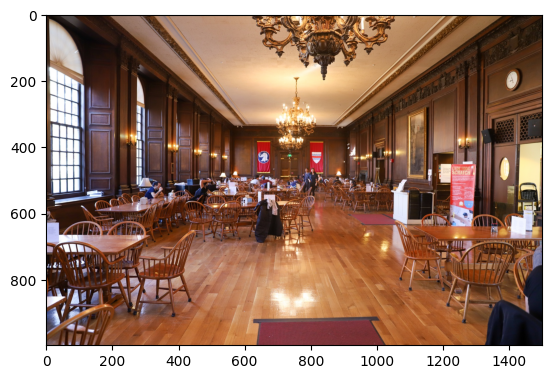

In [10]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
img_path = 'dataset/train/1- sparse/File 00008.jpg'

raw_image = Image.open(img_path)

print(raw_image)

plt.imshow(raw_image)


#raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [20]:
text = "Classify 1 of 3 classes: 1 empty, 2 moderately busy, 3 extremely"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))
# >>> a photography of a woman and her dog

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

ValueError: Input length of input_ids is 37, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.